In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from os.path import join, exists, isfile, isdir, abspath, dirname, basename, realpath
from os import makedirs, listdir, pardir, getcwd
from dataclasses import dataclass, field

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

##### Helpful functions

In [2]:
def undirected_to_directed(graph: nx.Graph) -> nx.DiGraph:
    """
    Converts an undirected graph to a directed graph
    """
    di_graph = nx.DiGraph()
    di_graph.add_edges_from(graph.edges())
    return di_graph

In [3]:
algorithms_to_run = []

In [4]:
@dataclass(frozen=False, order=False, )
class CentralityAlgorithm:
    """
    A data-class to store centrality measures arguments and other options
    """
    name: str = field(default="")
    func: object = field(default=print)
    args: dict = field(default_factory=dict)
    options: dict = field(default_factory=dict)

In [5]:
degree = CentralityAlgorithm("degree", nx.degree_centrality, { "max_iter": 100 }, {})
algorithms_to_run.append(degree)

In [ ]:
algorithms_to_run.append(CentralityAlgorithm("degree_centrality", nx.degree_centrality, {}, {"direction":"both"}))
algorithms_to_run.append(CentralityAlgorithm("in_degree_centrality", nx.in_degree_centrality, {}, {"direction":"directed"}))
algorithms_to_run.append(CentralityAlgorithm("out_degree_centrality", nx.out_degree_centrality, {}, {"direction":"directed"}))
algorithms_to_run.append(CentralityAlgorithm("eigenvector_centrality", nx.eigenvector_centrality, {"max_iter":100,"tol":1.0e-6,"weight":"weight"}, {"direction":"both"}))
algorithms_to_run.append(CentralityAlgorithm("katz_centrality", nx.katz_centrality, {"alpha":0.1,"beta":1.0,"max_iter":1000,"tol":1.0e-6,"normalized":True,"weight":"weight"}, {"direction":"both"}))
algorithms_to_run.append(CentralityAlgorithm("pagerank", nx.pagerank, {"alpha":0.85,"max_iter":100,"tol":1.0e-6,"weight":"weight"}, {"direction":"both"}))
algorithms_to_run.append(CentralityAlgorithm("voterank", nx.voterank, {"number_of_nodes":10}, {"direction":"both"}))
algorithms_to_run.append(CentralityAlgorithm("closeness_centrality", nx.closeness_centrality, {"distance":"weight"}, {"direction":"both"}))
algorithms_to_run.append(CentralityAlgorithm("harmonic_centrality", nx.harmonic_centrality, {"distance":"weight"}, {"direction":"both"}))
algorithms_to_run.append(CentralityAlgorithm("betweenness_centrality", nx.betweenness_centrality, {"k":500,"seed":7,"normalized":True,"weight":"weight"}, {"direction":"both"}))

In [6]:
parent_dir = abspath(join(join(getcwd(), pardir), pardir))
data_dir = join(parent_dir, 'data')

In [7]:
graph_fly = nx.read_edgelist(join(data_dir, "DM-HT_small.txt"), nodetype=str, data=(("weight", float),))

In [ ]:
config = {
    "func": nx.eigenvector_centrality_numpy,
    "args": {
        "max_iter": 10,
    }
}

In [8]:
di_graph = undirected_to_directed(graph_fly)
di_graph.number_of_nodes()
di_graph.number_of_edges()

27

21

In [9]:
degree.func(di_graph, **degree.args)

TypeError: degree_centrality() got an unexpected keyword argument 'max_iter'

In [ ]:
config["func"](di_graph, **config["args"])

config["func"](di_graph, max_iter=10)

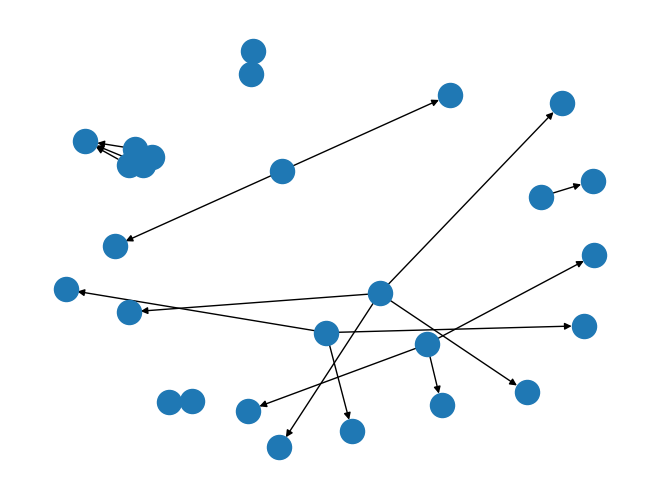

In [6]:
nx.draw(di_graph)

In [ ]:
# pos=nx.planar_layout(graph_fly)
nx.draw(graph_fly)

In [ ]:
#draw the sample subgraph in matplotlib
pos=nx.planar_layout(graph_fly_sampleDraw)
labels = nx.get_edge_attributes(graph_fly_sampleDraw,'weight')
nx.draw(graph_fly_sampleDraw,with_labels=True,pos=pos)
nx.draw_networkx_edge_labels(graph_fly_sampleDraw,pos=pos,edge_labels=labels,verticalalignment="bottom",font_size=10)
ax = plt.gca()
ax.margins(0.1)
plt.axis("on")
plt.title("Subgraph of Flies' Protein-protien Interactions")
plt.show()

————————————————————————————————————
**Graph algorithms**  
references:
https://networkx.org/documentation/networkx-1.10/reference/algorithms.centrality.html

In [ ]:
nx.degree_centrality(graph_fly_sampleDraw)

In [ ]:
nx.in_degree_centrality(graph_fly_sampleDraw)

In [ ]:
nx.betweenness_centrality(graph_fly)

In [ ]:
nx.betweenness_centrality(graph_fly_sampleDraw)

In [ ]:
#nx.current_flow_betweenness_centrality(graph_fly_sampleDraw)
#for undirected graphs only

In [ ]:
nx.closeness_centrality(graph_fly_sampleDraw)

In [ ]:
# nx.eigenvector_centrality(graph_fly_sampleDraw)
# for connected graphs only

In [ ]:
#nx.current_flow_closeness_centrality(graph_fly_sampleDraw)
#for undirected graphs only

In [ ]:
#nx.communicability(graph_fly_sampleDraw)
#for undirected graphs only

In [ ]:
nx.load_centrality(graph_fly_sampleDraw)